<a href="https://colab.research.google.com/github/bharu6522/ADS_INDIA/blob/main/cickViz_Assignment_28Jan2k25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df.head()

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,crease_position_y,crease_position_z,stumps_position_y,stumps_position_z,bounce_velocity_ratio_z,release_angle,drop_angle,bounce_angle,batting_hand,bowling_hand,bowling_type,runs,wicket
0,87.42,-1.64,2.44,0.78,2.12,0.27,5.35,0.23,0.46,0.21,0.49,-0.50,-2.81,-15.69,8.78,left,right,spin,1,0
1,141.37,0.83,-0.36,-0.76,2.10,-0.15,7.29,0.19,0.71,0.27,0.80,-0.59,-8.88,-12.34,7.90,right,right,pace,1,0
2,133.41,-0.80,0.16,0.30,1.83,0.15,3.78,0.11,0.21,0.10,0.27,-0.47,-4.72,-9.53,4.91,right,left,pace,1,0
3,98.07,1.00,NaN,-0.99,2.00,-0.33,1.80,-0.30,0.13,-0.24,0.30,-0.65,-0.78,-13.29,9.18,right,left,spin,0,0
4,89.12,0.81,-2.45,-0.62,2.15,0.13,4.03,0.18,0.45,0.21,0.57,-0.57,-0.72,-16.55,10.25,right,right,spin,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200789 entries, 0 to 200788
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   release_speed_kph        200333 non-null  float64
 1   swing_angle              200534 non-null  float64
 2   deviation                194981 non-null  float64
 3   release_position_y       200527 non-null  float64
 4   release_position_z       200402 non-null  float64
 5   bounce_position_y        200465 non-null  float64
 6   bounce_position_x        200520 non-null  float64
 7   crease_position_y        200535 non-null  float64
 8   crease_position_z        200506 non-null  float64
 9   stumps_position_y        200523 non-null  float64
 10  stumps_position_z        200506 non-null  float64
 11  bounce_velocity_ratio_z  200496 non-null  float64
 12  release_angle            200533 non-null  float64
 13  drop_angle               200510 non-null  float64
 14  boun

In [ ]:
df.describe()

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,crease_position_y,crease_position_z,stumps_position_y,stumps_position_z,bounce_velocity_ratio_z,release_angle,drop_angle,bounce_angle,runs,wicket
count,200333.000000,200534.000000,194981.000000,200527.000000,200402.000000,200465.000000,200520.000000,200535.000000,200506.000000,200523.000000,200506.000000,200496.000000,200533.000000,200510.000000,200509.000000,200789.000000,200789.000000
mean,113.314104,0.181257,-0.205346,-0.323727,2.003797,-0.141884,6.140859,-0.076211,0.668237,-0.059821,0.744015,-0.607788,-5.508132,-13.918712,9.529667,1.290763,0.049903
std,21.574559,1.225102,1.884765,0.636353,0.131172,0.336724,2.845008,0.341465,0.318014,0.366915,0.320691,0.077297,4.183278,2.615902,2.290649,1.626499,0.217745
min,40.200000,-24.500000,-24.080000,-3.000000,1.020000,-1.300000,-8.930000,-1.540000,0.000000,-1.800000,0.000000,-2.880000,-43.760000,-44.210000,0.020000,0.000000,0.000000
25%,90.810000,-0.480000,-0.860000,-0.750000,1.930000,-0.380000,4.470000,-0.290000,0.480000,-0.290000,0.560000,-0.650000,-8.340000,-15.790000,7.870000,0.000000,0.000000
50%,119.260000,0.190000,-0.040000,-0.570000,1.990000,-0.170000,6.120000,-0.080000,0.640000,-0.060000,0.720000,-0.610000,-5.270000,-13.950000,9.280000,1.000000,0.000000
75%,132.840000,0.880000,0.620000,0.160000,2.080000,0.080000,7.980000,0.140000,0.820000,0.170000,0.890000,-0.560000,-2.400000,-11.980000,10.970000,1.000000,0.000000
max,168.670000,24.360000,24.290000,2.980000,6.710000,1.300000,18.730000,1.900000,3.380000,1.950000,3.360000,0.000000,43.550000,-0.360000,44.220000,6.000000,1.000000


## Missing Values

In [ ]:
missing_values = df.isnull().sum()
missing_values_percent = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)

In [ ]:
data = df[:]
data.dropna(inplace = True) # percentage of missing values is very low so dropping all the mssing data
numeric_cols = data.columns[df.dtypes != 'object']
categorical_cols = data.columns[df.dtypes == 'object']


<ipython-input-7-fe66aa8b1ee6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True) # percentage of missing values is very low so dropping all the mssing data


## EDA

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


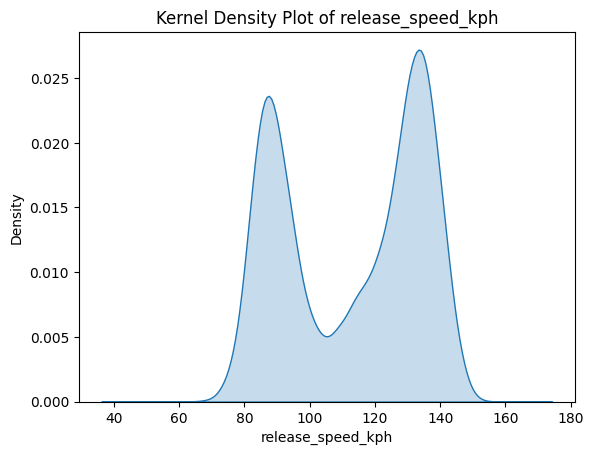

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


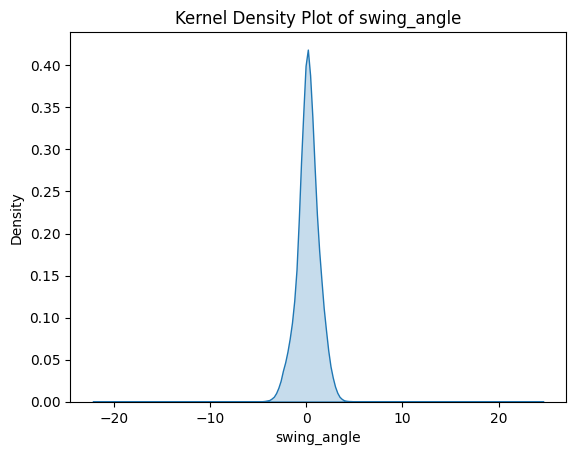

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


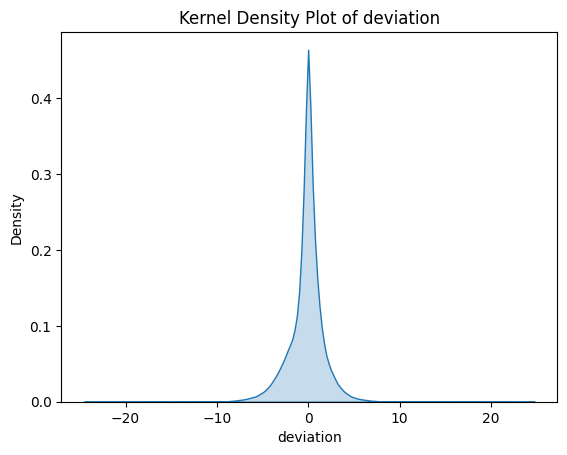

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


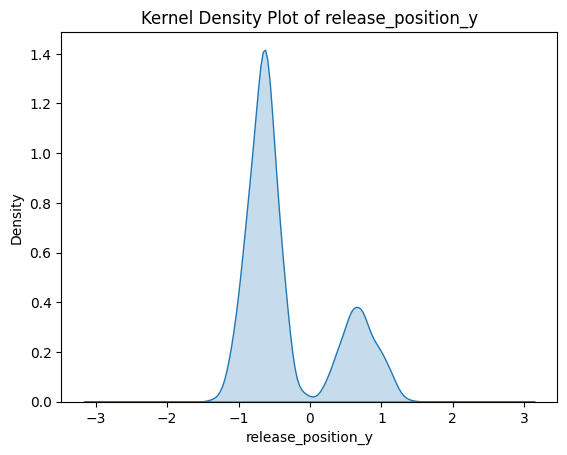

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


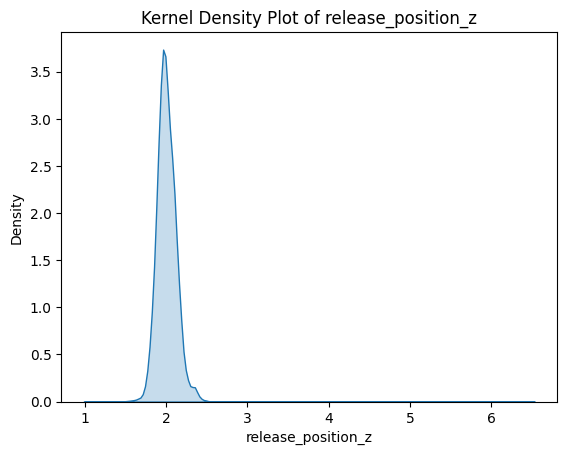

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


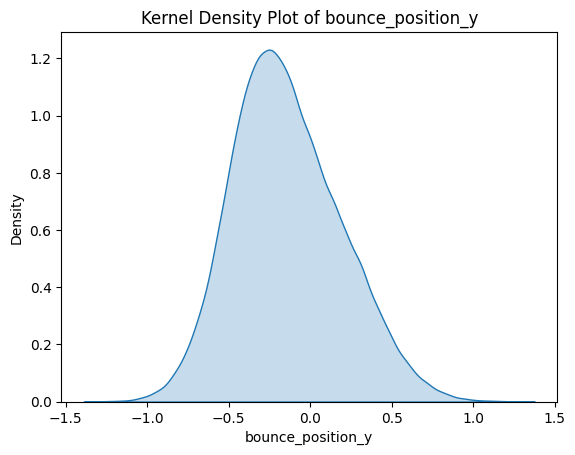

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


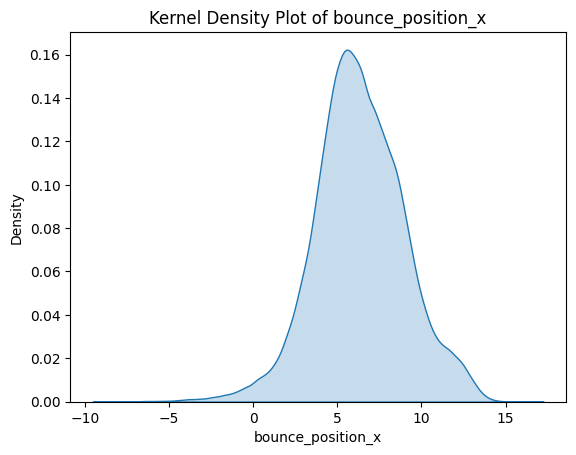

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


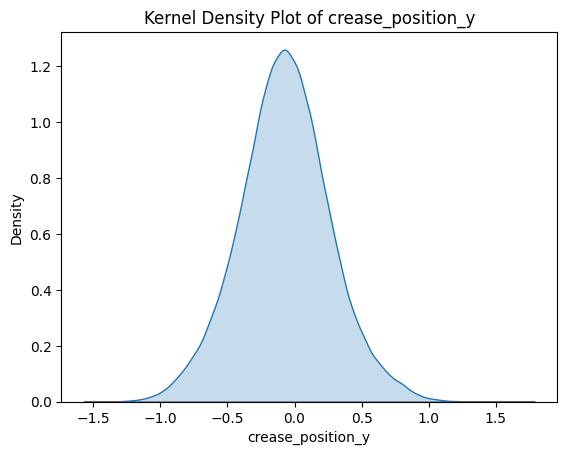

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


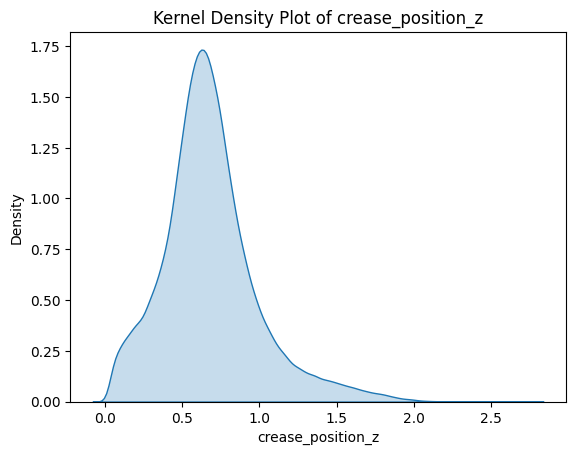

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


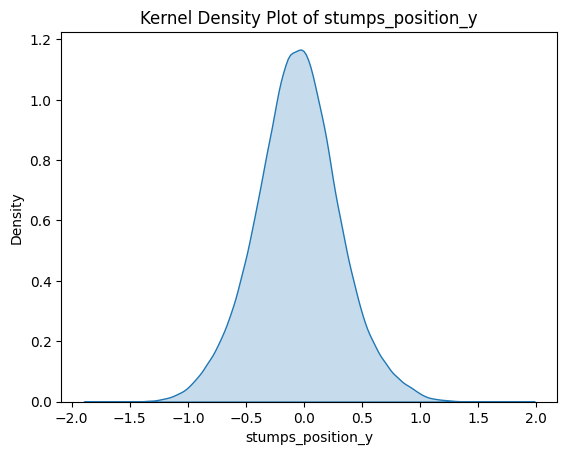

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


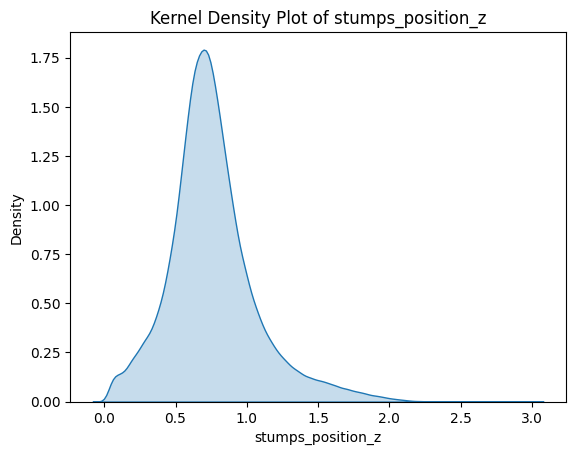

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


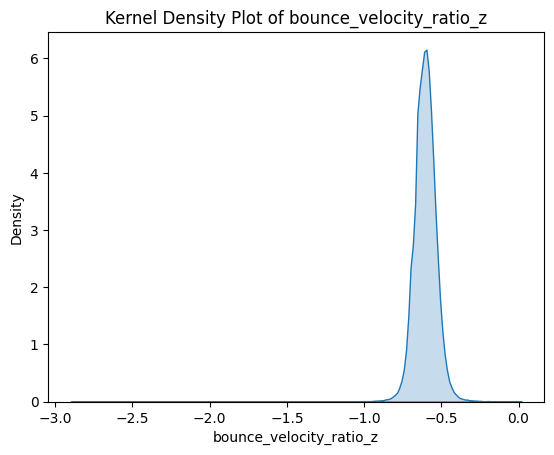

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


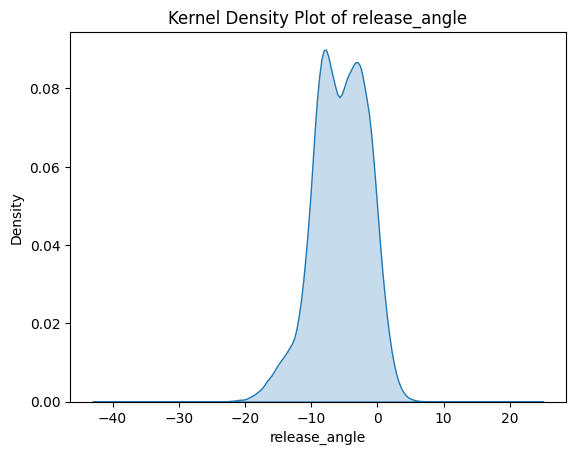

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


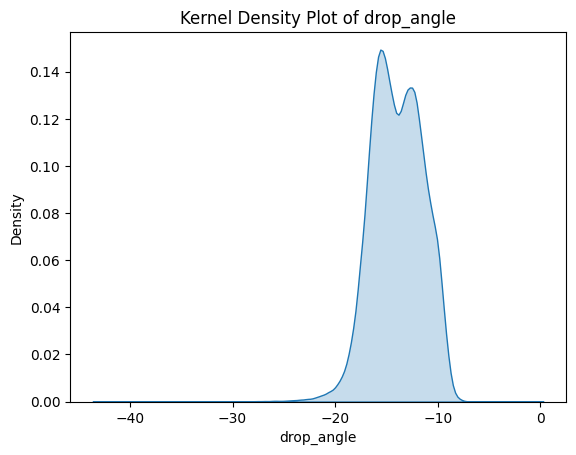

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


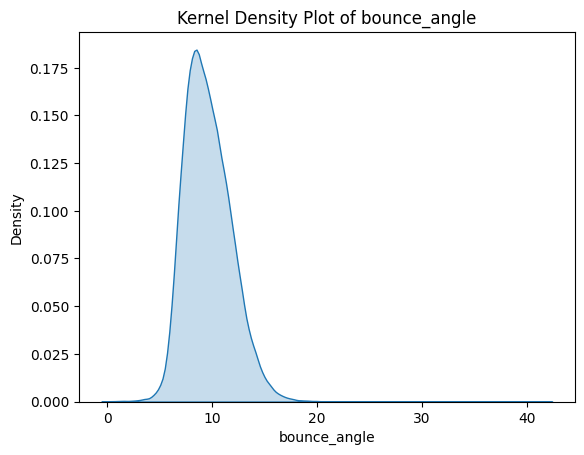

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


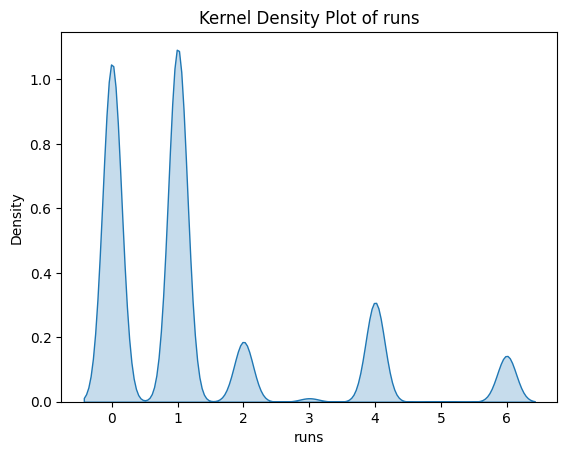

<ipython-input-8-ed33b42ec27a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


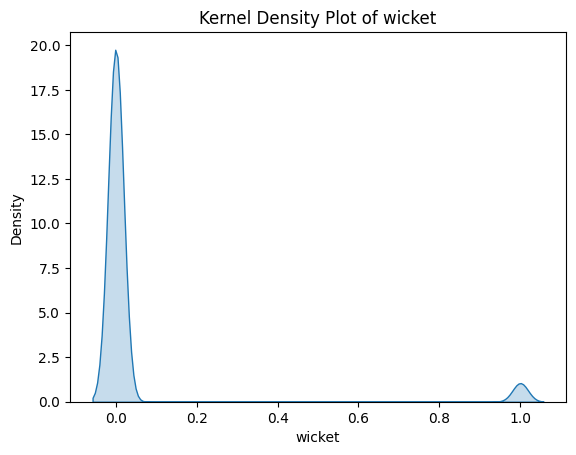

In [ ]:
for col in numeric_cols:
    sns.kdeplot(data[col], shade=True)
    plt.title(f"Kernel Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


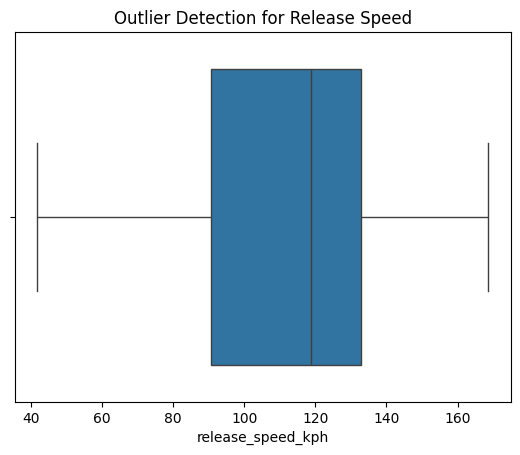

In [ ]:
sns.boxplot(data=data, x="release_speed_kph")
plt.title("Outlier Detection for Release Speed")
plt.show()


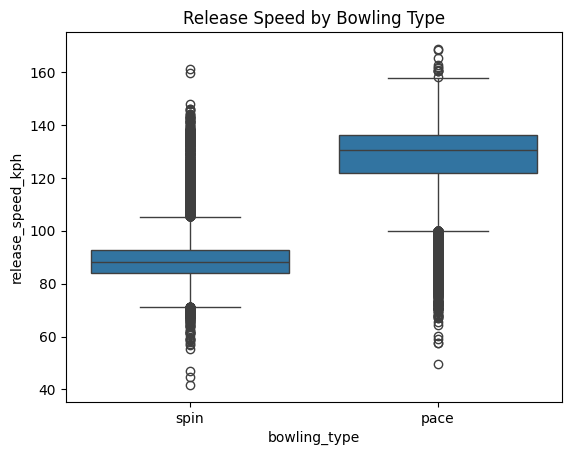

In [ ]:
sns.boxplot(data=data, x="bowling_type", y="release_speed_kph")
plt.title("Release Speed by Bowling Type")
plt.show()

In [ ]:
data.groupby("bowling_type")["release_speed_kph"].mean()

,release_speed_kph
bowling_type,
pace,127.823476
spin,88.632489


In [ ]:
data.isnull().sum()

,0
release_speed_kph,0
swing_angle,0
deviation,0
release_position_y,0
release_position_z,0
bounce_position_y,0
bounce_position_x,0
crease_position_y,0
crease_position_z,0
stumps_position_y,0


In [ ]:
selected_columns = ["release_speed_kph", "swing_angle", "deviation"]

<ipython-input-14-9a6c1a2cf640>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, label=col)


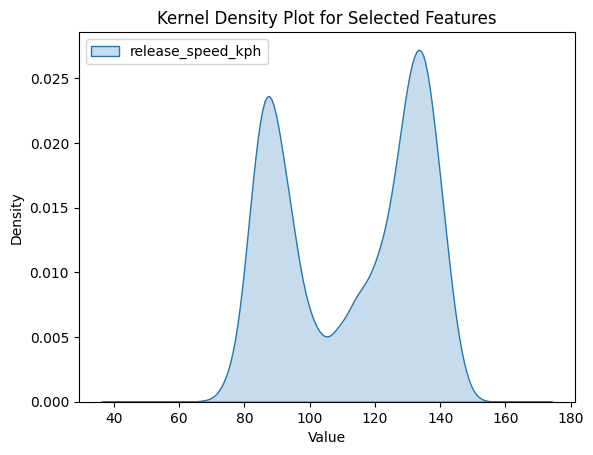

<ipython-input-14-9a6c1a2cf640>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, label=col)


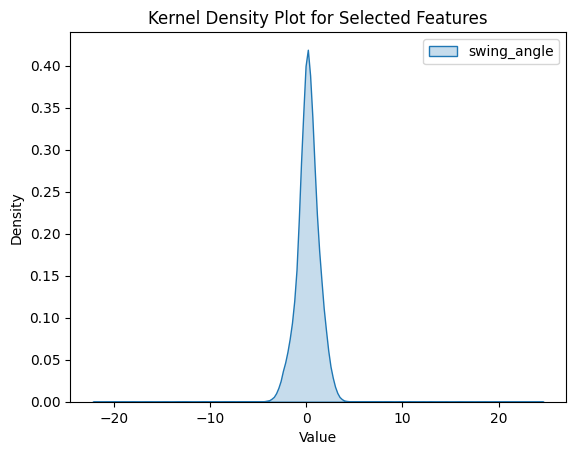

<ipython-input-14-9a6c1a2cf640>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, label=col)


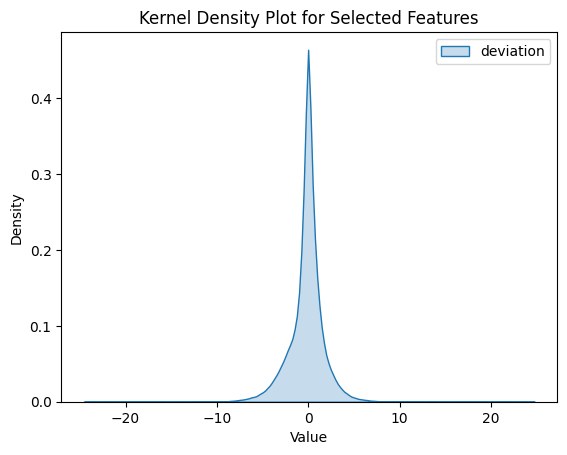

In [ ]:
for col in selected_columns:
    sns.kdeplot(data[col], shade=True, label=col)
    plt.title("Kernel Density Plot for Selected Features")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()



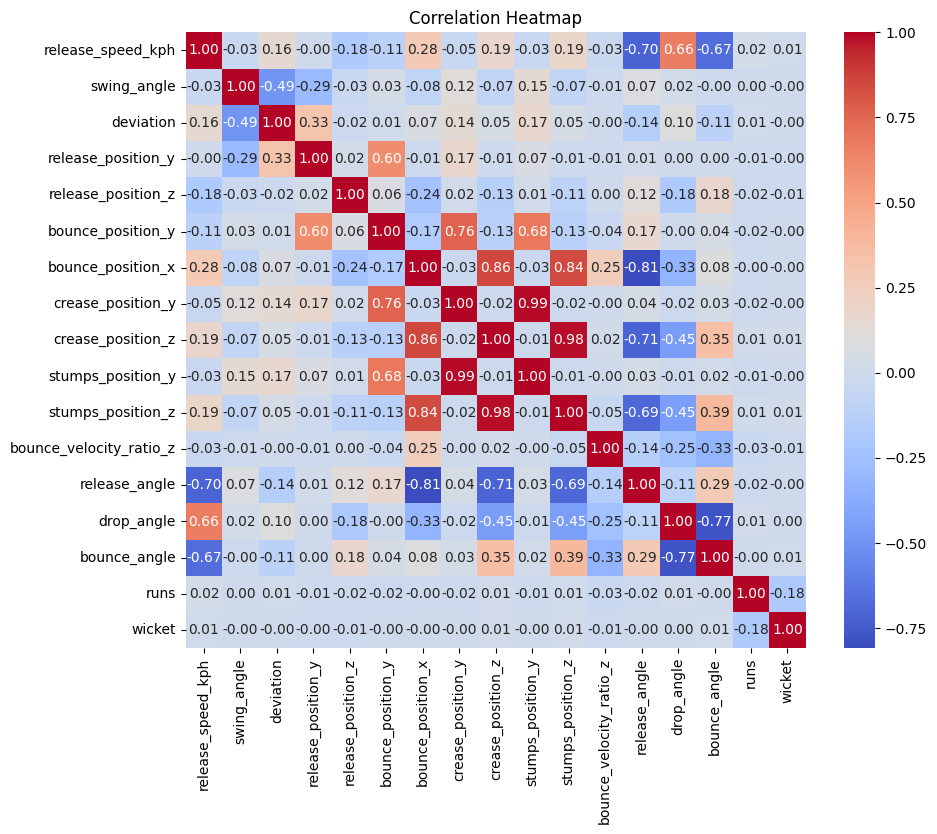

In [ ]:
corr_data = data[['release_speed_kph', 'swing_angle', 'deviation', 'release_position_y',
       'release_position_z', 'bounce_position_y', 'bounce_position_x',
       'crease_position_y', 'crease_position_z', 'stumps_position_y',
       'stumps_position_z', 'bounce_velocity_ratio_z', 'release_angle',
       'drop_angle', 'bounce_angle', 'runs', 'wicket']]

plt.figure(figsize=(10, 8))
# Visualize with a heatmap
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
features_columns = ['release_speed_kph', 'swing_angle', 'deviation', 'release_position_y',
       'release_position_z', 'bounce_position_y', 'bounce_position_x',
       'crease_position_y', 'crease_position_z', 'stumps_position_y',
       'stumps_position_z', 'bounce_velocity_ratio_z', 'release_angle',
       'drop_angle', 'bounce_angle']


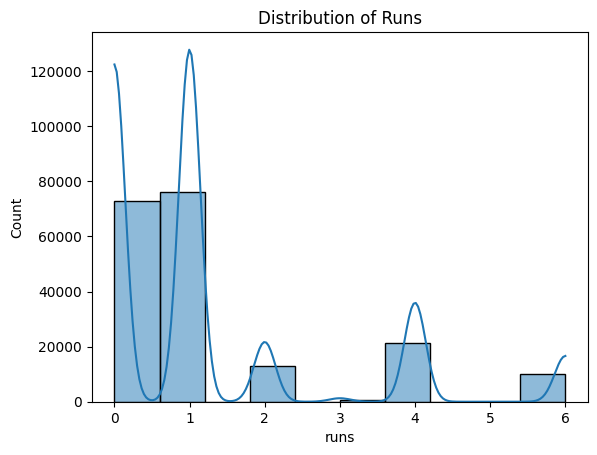

In [ ]:
sns.histplot(data["runs"], bins=10, kde=True)
plt.title("Distribution of Runs")
plt.show()

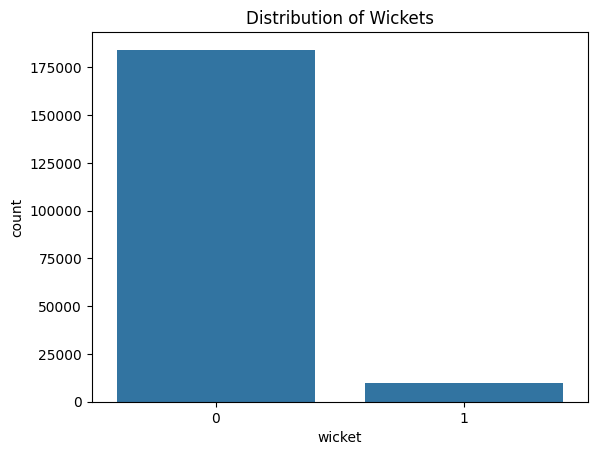

In [ ]:
sns.countplot(data=data, x="wicket")
plt.title("Distribution of Wickets")
plt.show()

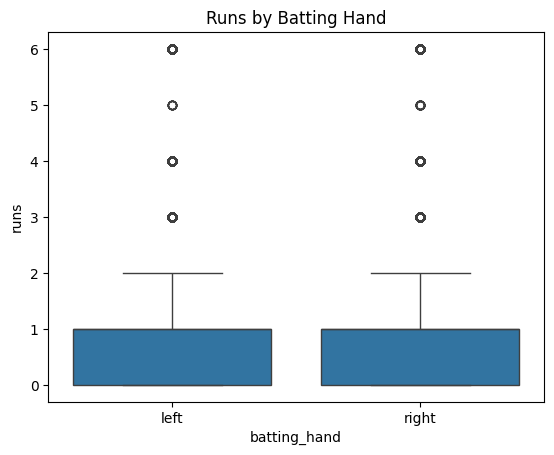

In [ ]:
sns.boxplot(data=data, x="batting_hand", y="runs")
plt.title("Runs by Batting Hand")
plt.show()

<Axes: >

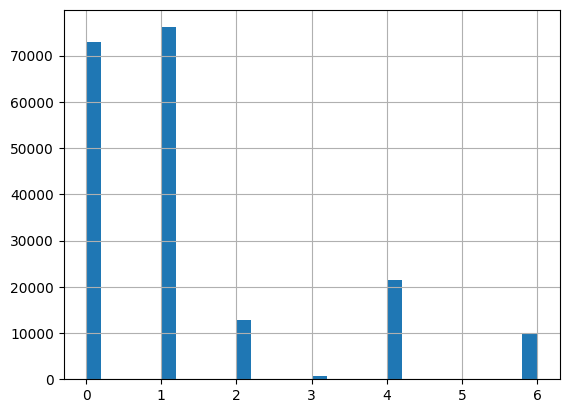

In [ ]:
data["runs"].hist(bins = 30)

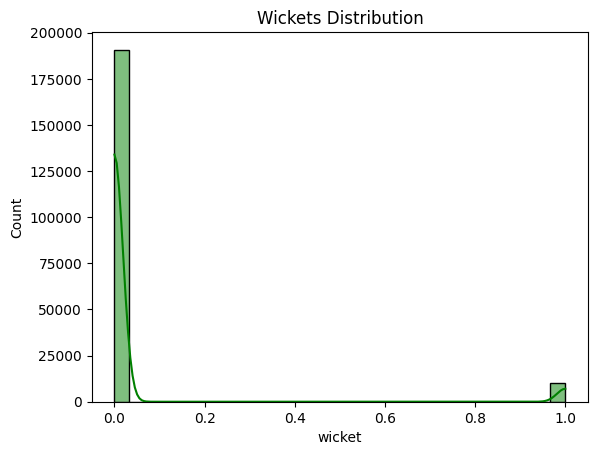

In [ ]:
sns.histplot(df['wicket'], kde=True, bins=30, color='green')
plt.title('Wickets Distribution')
plt.show()

<Axes: xlabel='runs', ylabel='release_speed_kph'>

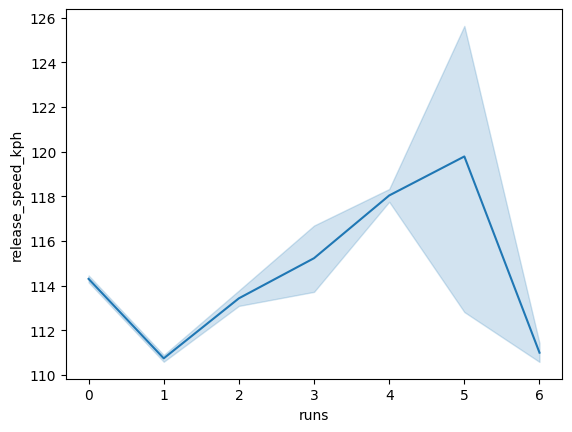

In [ ]:
sns.lineplot(x='runs',y='release_speed_kph',data = data)

In [ ]:
from scipy.stats import spearmanr

for feature in features_columns:
    corr, _ = spearmanr(data[feature], data['runs'])
    print(f"Spearman Correlation for {feature}: {corr}")


Spearman Correlation for release_speed_kph: -0.011063889149126437
Spearman Correlation for swing_angle: 0.005241674268807718
Spearman Correlation for deviation: 0.004959468526634382
Spearman Correlation for release_position_y: -0.010410158661733943
Spearman Correlation for release_position_z: -0.008411401913117693
Spearman Correlation for bounce_position_y: -0.016502147797959863
Spearman Correlation for bounce_position_x: -0.02486761941504191
Spearman Correlation for crease_position_y: -0.007390746019712996
Spearman Correlation for crease_position_z: -0.022164416124202443
Spearman Correlation for stumps_position_y: -0.004857940246173967
Spearman Correlation for stumps_position_z: -0.02628426167741914
Spearman Correlation for bounce_velocity_ratio_z: -0.018617609593209614
Spearman Correlation for release_angle: 0.007815444133697641
Spearman Correlation for drop_angle: 0.007879957692423263
Spearman Correlation for bounce_angle: 0.0010763449906298734


In [ ]:
encoded_data = data.copy()

## LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = LabelEncoder()
for col in categorical_cols:
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

not_scaled_data = encoded_data.copy()
not_scaled_data_2 = not_scaled_data.copy()

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_scaling_cols=  numeric_cols[:-2]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data[numeric_scaling_cols])
not_scaled_data[numeric_scaling_cols] = scaled_data
witohut_scale_data = not_scaled_data_2.copy()
scaled_data = not_scaled_data.copy()

In [ ]:
without_scaled_data2 = witohut_scale_data.copy()
scaled_data2 = scaled_data.copy()

## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_data.drop(['runs','wicket'], axis = 1)
y_runs = scaled_data['runs']
y_wicket = scaled_data['wicket']

X_train, X_test, y_train_runs, y_test_runs = train_test_split(X, y_runs, test_size=0.2, random_state=42)
_, __, y_train_wicket, y_test_wicket = train_test_split(X, y_wicket, test_size=0.2, random_state=42)

# Applying Models

## Random Forest
regressor for runs and classifer for wickets

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train_runs)
y_pred_runs = rf_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_runs, y_pred_runs)
print("Random Forest Regression MSE:", mse)

Random Forest Regression MSE: 2.651544412218945


In [ ]:
# Random Forest for Classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_wicket)
y_pred_wicket = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test_wicket, y_pred_wicket)
print("Random Forest Classification Accuracy:", accuracy)

Random Forest Classification Accuracy: 0.9498633809351962


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_runs, y_pred_runs)
print("R² Score:", r2)

R² Score: -0.0019925558606770366


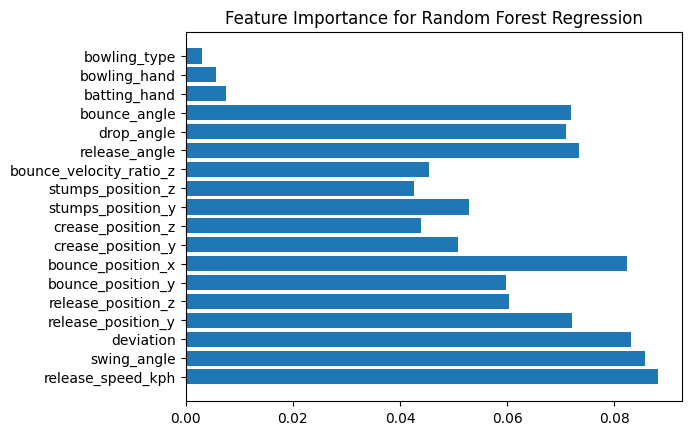

In [ ]:
# Analyzing feature importance
importances = rf_regressor.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance for Random Forest Regression")
plt.show()

In [ ]:
# Applying log for runs
y_train_runs_log = np.log1p(y_train_runs)  # log(1 + runs)
y_test_runs_log = np.log1p(y_test_runs)

rf_regressor_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_log.fit(X_train, y_train_runs_log)
y_pred_runs_log = rf_regressor_log.predict(X_test)
y_pred_runs_original = np.expm1(y_pred_runs_log)  # Reverse log(1 + runs)
mse_log = mean_squared_error(y_test_runs, y_pred_runs_original)
r2_log = r2_score(y_test_runs, y_pred_runs_original)

In [ ]:
print("MSE for Log-transformed Data:", mse_log)
print("R² for Log-transformed Data:", r2_log)

MSE for Log-transformed Data: 2.723237008948651
R² for Log-transformed Data: -0.029084483079565793


## XG-BOOST
regressor for runs and classifer for wickets

In [ ]:
from xgboost import XGBRegressor, XGBClassifier
# XGBoost for Regression
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train_runs)
y_pred_runs_xgb = xgb_regressor.predict(X_test)

In [ ]:
# Evaluate Regression Model
mse_xgb = mean_squared_error(y_test_runs, y_pred_runs_xgb)
print("XGBoost Regression MSE:", mse_xgb)

XGBoost Regression MSE: 2.5831031799316406


In [ ]:
# XGBoost for Classification
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_wicket)
y_pred_wicket_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Evaluate Classification Model
accuracy_xgb = accuracy_score(y_test_wicket, y_pred_wicket_xgb)
print("XGBoost Classification Accuracy:", accuracy_xgb)

XGBoost Classification Accuracy: 0.9499922668453885


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_wicket, y_pred_wicket_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36858
           1       0.33      0.00      0.00      1936

    accuracy                           0.95     38794
   macro avg       0.64      0.50      0.49     38794
weighted avg       0.92      0.95      0.93     38794



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_wicket, y_pred_wicket_xgb))

Confusion Matrix:
 [[36850     8]
 [ 1932     4]]


In [ ]:
from sklearn.metrics import r2_score
r2_runs = r2_score(y_test_runs, y_pred_runs_xgb)
print(f"R² Score (Runs): {r2_runs}")

R² Score (Runs): 0.023870766162872314


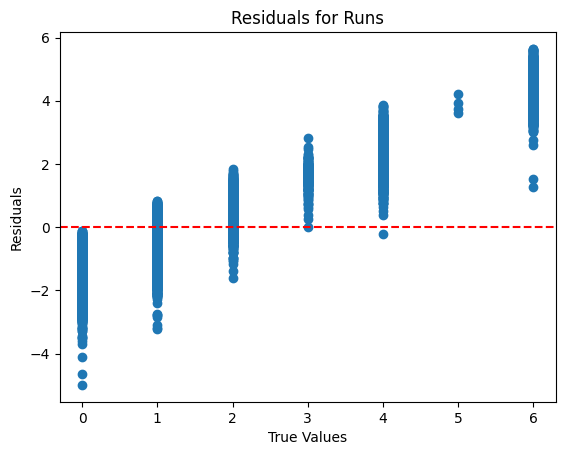

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test_runs - y_pred_runs
plt.scatter(y_test_runs, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for Runs")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

## Variances

In [ ]:
compare_data = pd.DataFrame({
    'actual_runs': y_test_runs,  # Actual target values
    'predicted_runs': y_pred_runs,  # Predicted values
    'actual_wickets': y_test_wicket,
    'predicted_wickets': y_pred_wicket
})


In [ ]:
actual_variance_runs = compare_data['actual_runs'].var()  # Variance of actual runs
predicted_variance_runs = compare_data['predicted_runs'].var()  # Variance of predicted runs

print(f"Actual Variance: {actual_variance_runs}")
print(f"Predicted Variance: {predicted_variance_runs}")


Actual Variance: 2.6463397834778206
Predicted Variance: 0.20564377530646916


In [ ]:
actual_variance_wicket = compare_data['actual_wickets'].var()  # Variance of actual runs
predicted_variance_wicket = compare_data['predicted_wickets'].var()  # Variance of predicted runs

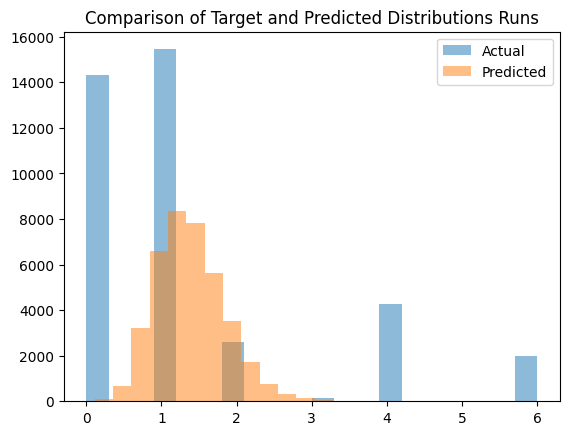

In [ ]:
import matplotlib.pyplot as plt

plt.hist(compare_data['actual_runs'], bins=20, alpha=0.5, label='Actual')
plt.hist(compare_data['predicted_runs'], bins=20, alpha=0.5, label='Predicted')
plt.legend()
plt.title("Comparison of Target and Predicted Distributions Runs")
plt.show()

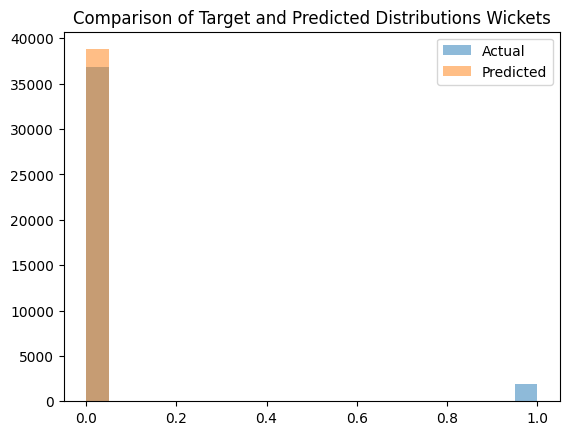

In [ ]:
import matplotlib.pyplot as plt

plt.hist(compare_data['actual_wickets'], bins=20, alpha=0.5, label='Actual')
plt.hist(compare_data['predicted_wickets'], bins=20, alpha=0.5, label='Predicted')
plt.legend()
plt.title("Comparison of Target and Predicted Distributions Wickets")
plt.show()

## Ensemble model for (Random forest + XG Boost )

In [ ]:
# Predict using both models
y_pred_runs_rf = rf_regressor.predict(X_test)  # Predictions from Random Forest
y_pred_runs_xgb = xgb_regressor.predict(X_test)  # Predictions from XGBoost

# Combine predictions using weighted average
rf_weight = 0.5  # Adjust weights based on model performance
xgb_weight = 0.5
y_pred_runs_ensemble = (rf_weight * y_pred_runs_rf) + (xgb_weight * y_pred_runs_xgb)

# Evaluate ensemble predictions
from sklearn.metrics import mean_squared_error, r2_score

mse_ensemble = mean_squared_error(y_test_runs, y_pred_runs_ensemble)
r2_ensemble = r2_score(y_test_runs, y_pred_runs_ensemble)

print("Ensemble Regression MSE:", mse_ensemble)
print("Ensemble Regression R²:", r2_ensemble)


Ensemble Regression MSE: 2.5795924535618395
Ensemble Regression R²: 0.025197381679792907


In [ ]:
# Predict probabilities using both models
y_pred_probs_rf = rf_classifier.predict_proba(X_test)  # Random Forest probabilities
y_pred_probs_xgb = xgb_classifier.predict_proba(X_test)  # XGBoost probabilities

# Combine probabilities using weighted average
rf_weight = 0.5  # Adjust weights based on performance
xgb_weight = 0.5
ensemble_probs = (rf_weight * y_pred_probs_rf) + (xgb_weight * y_pred_probs_xgb)

# Final predictions based on the highest probability
y_pred_wicket_ensemble = np.argmax(ensemble_probs, axis=1)

# Evaluate ensemble predictions
from sklearn.metrics import accuracy_score

accuracy_ensemble = accuracy_score(y_test_wicket, y_pred_wicket_ensemble)
print("Ensemble Classification Accuracy:", accuracy_ensemble)


Ensemble Classification Accuracy: 0.9500695983915038


In [ ]:
results = pd.DataFrame(X_test, columns=X.columns)

# Add actual target values
results['actual_runs'] = y_test_runs.values
results['actual_wickets'] = y_test_wicket.values

In [ ]:
results['predicted_runs'] = y_pred_runs_ensemble  # Ensemble predictions for runs
results['predicted_wickets'] = y_pred_wicket_ensemble  # Ensemble predictions for wickets

In [ ]:
results.head(5)

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,crease_position_y,crease_position_z,stumps_position_y,...,release_angle,drop_angle,bounce_angle,batting_hand,bowling_hand,bowling_type,actual_runs,actual_wickets,predicted_runs,predicted_wickets
165799,0.706802,-1.819588,-0.232153,-0.607976,-1.518803,-0.410294,0.571743,-0.369019,0.035827,-0.333060,...,-0.473896,0.930631,-0.878782,0,1,0,4,0,0.688681,0
5589,1.139220,-0.734296,0.061903,0.098672,-0.101998,0.457686,0.523198,0.574848,0.675985,0.544419,...,-0.756618,0.695379,-0.099246,0,1,0,0,0,0.783842,0
146812,0.817571,-1.118323,-0.248193,1.339231,-0.416843,0.667199,0.116165,-0.516498,-0.252244,-0.744378,...,-0.350658,0.895344,-0.790199,1,0,0,4,0,0.814651,0
170066,1.049770,-0.241741,0.045864,-0.388130,-0.731689,-0.919110,0.859280,-0.870448,0.355906,-0.826642,...,-0.957181,0.789480,-0.834490,1,1,0,1,0,1.550605,0
127170,-0.213186,1.035564,-0.606408,-0.623679,-0.574266,-0.140921,0.467184,0.397873,0.932048,0.462155,...,0.072216,-0.226028,0.768874,1,1,0,1,0,1.065059,0


# Answers

## Question 1 : Which Machine Learning model have you picked and why? Feel free to experiment with 1-3 model types and pick the best one

In [ ]:
# I used random forest and XG boost, as we can see that corelation matrix is showing non linear relationship betwen features, so there is no use of using
# Linear regression or any linear model. Because of non linearity i choose these two model.
# I also used ensemble model for predicitng a combined aacuracy using Random Forest and XG-Boost classifier.
# But if i have to choose one model then i will pick XG boost because of following reasons :
# A. For predicting runs :
# XGBoost had a slightly lower MSE (2.58) compared to Random Forest (2.65). This indicates that XGBoost performed better in predicting runs.
# R² Score: Both models performed poorly for predicting runs, with an R² score close to zero. However, XGBoost showed slightly better results in comparison to Random Forest.
# B. For predicitng wickets:
# Accuracy: Both models achieved high accuracy (around 94.99%). However, accuracy alone can be misleading in the case of imbalanced datasets.


## Question 2. How are you evaluating the results of your model? (e.g. What metrics and visualisations are most useful)

In [ ]:
# I am evaluating the result using MSE, R² Score, Classification report nad confusion matrix. For visualization i am using feature importance.
# For Regression (Predicting runs):
# Random Forest MSE: 2.6515
# XGBoost MSE: 2.5831 (slightly better)
# R² Score: Indicates how well the model explains the variance in the target variable. An R² score closer to 1 indicates a better fit, while a score near or below 0 indicates poor performance.
# Random Forest R²: -0.00199 (poor performance for predicting runs)
# XGBoost R²: Similar to Random Forest, indicating the model isn't capturing variance well.

# For Classification (Predicting wickets):
# Random Forest Accuracy: 94.99%
# XGBoost Accuracy: 94.99% (similar to Random Forest)
# Precision:
# Class 0 Precision: 0.95 (good precision for non-wicket class)
# Class 1 Precision: 0.33 (low precision for the wicket class)
# Recall:
# Class 0 Recall: 1.00 (perfect recall for non-wicket class)
# Class 1 Recall: 0.00 (no recall for the wicket class)
# F1-Score:
# Class 0 F1-Score: 0.97
# Class 1 F1-Score: 0.00 (indicating poor detection of wickets)


# Confusion Matrix: A detailed breakdown of model predictions:

# True Negatives (TN): 36,850 (correct predictions of class 0)
# False Positives (FP): 8 (misclassified wicket as no wicket)
# False Negatives (FN): 1,932 (misclassified no wicket as wicket)
# True Positives (TP): 4 (correct predictions of wicket)

##Question 3 : Does the variance of your model's output distribution match the variance of the target distribution (runs)? - - If yes, why? If not, why not? Which has the larger variance and why?

In [ ]:
# No, the variance of the model's output distribution does not match the variance of the target distribution (runs).
# The target distribution (runs) and the predicted output distribution from the model (Random Forest and XGBoost) have significantly different variances
# The larger variance in the target distribution indicates more spread or fluctuation in the actual runs values,
# while the predicted values are more concentrated,showing that the model might not be capturing the full range or variability of the actual values
# Also The model might not be capturing the underlying patterns or variability in the target (runs) due to insufficient feature importance or model complexity

## QUESTION 4 : Let’s say you’re working alongside some cricket coaches in the IPL. How would you
explain the learnings of your model to a coach, about the best areas to target as a bowler? - Please just focus on the general trends! Though there's a lot of deep study one can do into “the right areas to bowl”, the data you have doesn't have any player or ground information. So just report the general trends your model has learnt, even if you think the coach might already know these trends from their wider experience.

In [ ]:
# Based on the model's analysis of the data, here are the general trends that
# can be useful for understanding the best areas for a bowler to target:

# 1. Top-order batsmen tend to score the most runs, as they face more deliveries
# and are more likely to accumulate runs throughout their innings.
# 2. Early overs are typically harder to score off, with bowlers generally more successful
# in limiting runs due to freshness and field placements.

# 3. Bowling straight and on the stumps increases the likelihood of dismissing the batsman. Balls aimed at the stumps or just
# outside tend to result in a higher probability of getting the batsman out, as they force the batsman to play a shot,
# potentially getting bowled, trapped LBW, or caught.

# While these trends align with what a coach might already know, the model confirms the general effectiveness of these areas based on data-driven insights.
# By focusing on these areas, a bowler can maximize their effectiveness and increase their chances of success

## QUESTION 5:What future steps might you want to explore if you had another week of coding for this model?

In [ ]:
# Future Steps to Explore with More Time
# 1. Improving Model Performance
# a. Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV to fine-tune hyperparameters of Random Forest and XGBoost models
#  (e.g., n_estimators, max_depth, learning rate).
# b . Feature Engineering: Create new features (e.g., bowling speed, batting styles, weather conditions) to capture deeper insights.

# 2. Adjusting Class Weights: Modify class weights in XGBoost and Random Forest to focus more on the minority class (wickets).
# 3. Advanced Metrics: For classification, focus on Precision-Recall AUC and ROC-AUC. For regression, experiment with Mean Absolute Error (MAE) to improve interpretability.
# 4. Interactive Dashboard: Build an interactive dashboard with Streamlit or Dash for real-time insights into predictions and trends